In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
import random
import math
import scipy.stats as stats

In [2]:
t_f = 3*9.6
t_N = 960

W = 100

In [3]:
t = np.linspace(0,t_f,t_N)
dt = t[1] - t[0]

In [4]:
OU_WCE = np.zeros((W,t_N))

In [5]:
#Process parameters 
#dp = 5.1
dp = 1.0

sigma = 1.2
#sigma = 0.5

ap = -0.25
#ap = 0


OU_WCE[:,0] = 0


drift = lambda y,t: -y*dp # define drift term, 
diffusion = lambda y,t: sigma # define diffusion term

In [6]:
for i in range(t_N-1):
    for w in range(0,W):
            if w == 0 :
                OU_WCE[w,i+1] = OU_WCE[w,i]  + drift(OU_WCE[w,i],i*dt)*dt + dp*ap*dt
            if w == 1:
                OU_WCE[w,i+1] = OU_WCE[w,i]  + drift(OU_WCE[w,i],i*dt)*dt + dt*diffusion(OU_WCE[w,i],i*dt)*(1/np.sqrt(t_f))
            else :
                OU_WCE[w,i+1] = OU_WCE[w,i]  + drift(OU_WCE[w,i],i*dt)*dt + dt*diffusion(OU_WCE[w,i],i*dt)*np.sqrt(2/t_f)*np.cos(np.pi*(w-1)*t[i]/t_f)

In [7]:
def OU_mean_analytical(x):
    return ap*(1 - np.exp(-dp*x))

def OU_variance_analytical(x):
    return ((sigma**2)/(2*dp))*(1 - np.exp(-2*dp*x))

In [8]:
OU_variance_W0 = np.zeros((t_N))
OU_variance_W1 = np.zeros((t_N))
OU_variance_W2 = np.zeros((t_N))
OU_variance_W3 = np.zeros((t_N))
OU_variance_W4 = np.zeros((t_N))
OU_variance_W5 = np.zeros((t_N))
OU_variance_W6 = np.zeros((t_N))

In [9]:
for i in range(t_N):
    for w in range(1,3):
        OU_variance_W0[i] += (OU_WCE[w,i])**2
    for w in range(1,6):
        OU_variance_W1[i] += (OU_WCE[w,i])**2
    for w in range(1,11):
        OU_variance_W2[i] += (OU_WCE[w,i])**2
    for w in range(1,20):
        OU_variance_W3[i] += (OU_WCE[w,i])**2
    for w in range(1,30):
        OU_variance_W4[i] += (OU_WCE[w,i])**2
    for w in range(1,40):
        OU_variance_W5[i] += (OU_WCE[w,i])**2  
    for w in range(1,50):
        OU_variance_W6[i] += (OU_WCE[w,i])**2    

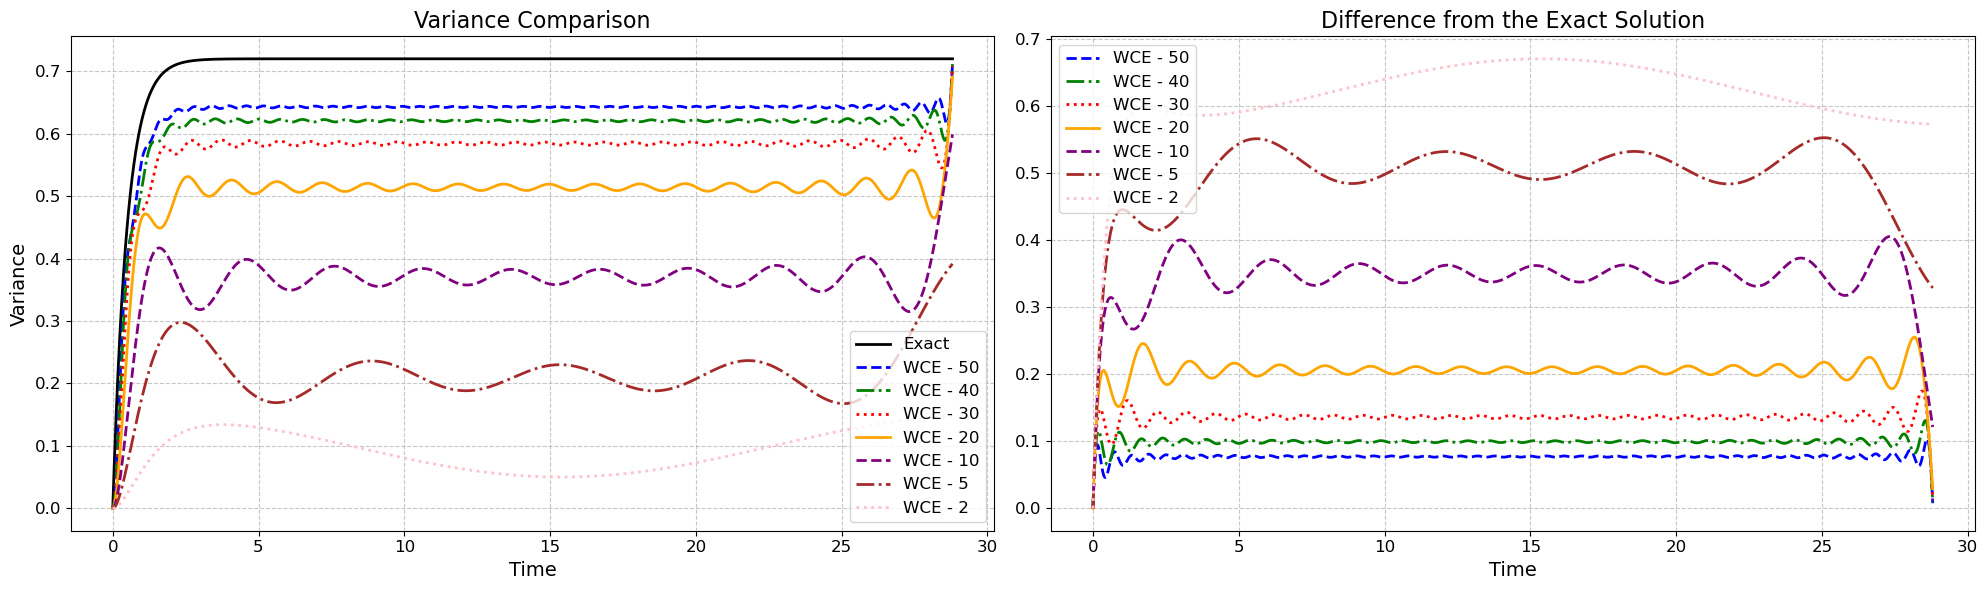

In [21]:
import matplotlib.pyplot as plt


# Create a figure with two subplots side by side
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

# First subplot: Variance Comparison
ax[0].plot(t, OU_variance_analytical(t), linestyle='-', color='black', linewidth=2, label='Exact')
ax[0].plot(t, OU_variance_W6, linestyle='--', color='blue', linewidth=2, label='WCE - 50')
ax[0].plot(t, OU_variance_W5, linestyle='-.', color='green', linewidth=2, label='WCE - 40')
ax[0].plot(t, OU_variance_W4, linestyle=':', color='red', linewidth=2, label='WCE - 30')
ax[0].plot(t, OU_variance_W3, linestyle='-', color='orange', linewidth=2, label='WCE - 20')
ax[0].plot(t, OU_variance_W2, linestyle='--', color='purple', linewidth=2, label='WCE - 10')
ax[0].plot(t, OU_variance_W1, linestyle='-.', color='brown', linewidth=2, label='WCE - 5')
ax[0].plot(t, OU_variance_W0, linestyle=':', color='pink', linewidth=2, label='WCE - 2')

ax[0].set_xlabel('Time', fontsize=14)
ax[0].set_ylabel('Variance', fontsize=14)
ax[0].set_title('Variance Comparison', fontsize=16)
ax[0].legend(loc='best', fontsize=12)
ax[0].grid(True, linestyle='--', alpha=0.7)
ax[0].tick_params(axis='both', which='major', labelsize=12)

# Second subplot: Difference from Analytical Solution
ax[1].plot(t, OU_variance_analytical(t) - OU_variance_W6, linestyle='--', color='blue', linewidth=2, label='WCE - 50')
ax[1].plot(t, OU_variance_analytical(t) - OU_variance_W5, linestyle='-.', color='green', linewidth=2, label='WCE - 40')
ax[1].plot(t, OU_variance_analytical(t) - OU_variance_W4, linestyle=':', color='red', linewidth=2, label='WCE - 30')
ax[1].plot(t, OU_variance_analytical(t) - OU_variance_W3, linestyle='-', color='orange', linewidth=2, label='WCE - 20')
ax[1].plot(t, OU_variance_analytical(t) - OU_variance_W2, linestyle='--', color='purple', linewidth=2, label='WCE - 10')
ax[1].plot(t, OU_variance_analytical(t) - OU_variance_W1, linestyle='-.', color='brown', linewidth=2, label='WCE - 5')
ax[1].plot(t, OU_variance_analytical(t) - OU_variance_W0, linestyle=':', color='pink', linewidth=2, label='WCE - 2')

ax[1].set_xlabel('Time', fontsize=14)
#ax[1].set_ylabel('Difference from Exact', fontsize=14)
ax[1].set_title('Difference from the Exact Solution', fontsize=16)
ax[1].legend(loc='best', fontsize=12)
ax[1].grid(True, linestyle='--', alpha=0.7)
ax[1].tick_params(axis='both', which='major', labelsize=12)

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig("Problem3_OU_WCE_Comparison_and_Difference.png")
plt.show()
